# Trabalho de mineração de dados



**Resumo** - O volume de dados criados vem se expandindo de maneira massiva, e as organizações atualmente têm se mostrado eficientes no armazenamento desses dados. Porém, ter uma grande quantidade de informação não significa ter conhecimento acerca dessas, sendo assim, é necessário utilizar estratégias que possam transformar um grande apanhado de informações em algo relevante do ponto de vista científico e/ou comercial. Tendo isso em vista, o trabalho a seguir tem como objetivo utilizar técnicas de  mineração de dados sobre uma base de dados previamente disponibilizada, a mesma contém informações acerca dos fatores pertinentes na análise e no diagnóstico de tumores. Será  abordada a problemática de classificação, demonstrando assim algumas opções para o tratamento dos dados, e para fazer a análise exploratória dos dados será utilizado a metodología de data mining CRISP-DM.

## 1. Introdução
A comunidade médica a muito direciona esforços no sentido de pesquisar maneiras e desenvolver ferramentas para o tratamento e a prevenção de diversas doenças. Nesse sentido, estudiosos do segmento vem se beneficiando dos avanços tecnológicos implementados especificamente para a área da saúde, pois com isso é possível otimizar o tempo dos diagnósticos e torná-los mais precisos, fazendo com que as chances de cura aumentem. Porém, ainda existe um longo caminho a ser percorrido, principalmente nos casos de doenças mais graves, como câncer, que por sua complexidade e letalidade é uma das que mais é estudada. 
    
Câncer(também conhecido como tumor maligno), é uma das enfermidades que mais mata no mundo. Ele se caracteriza como sendo uma anomalia encontrada em células doentes, que faz com que as mesmas cresçam de maneira descontrolada e adentrem em outros tecidos e órgãos. 

O diagnóstico precoce de um tumor maligno é extremamente importante, já que as chances de cura em estágios avançados diminuem drasticamente. Portanto, é necessário que hajam formas de otimizar o processo de detecção de tumores malignos, e é nesse contexto que a implementação de soluções baseadas em data mining pode ser de grande valor.

Dos desafios encontrados na identificação de um câncer, podemos citar a necessidade de identificar seus tipos e subtipos, o que faz com que o uso de mineração de dados possa ser útil no desenvolvimento de aplicações que tenham o objetivo de resolver esse problema, pois o uso de data mining pode auxiliar no momento de classificar pacientes com câncer e identificar aqueles que possam vir a apresentar a doença.

## 2. Entendimento do  negócio

O objetivo deste trabalho é aplicar técnicas de mineração de dados  sobre a base de dados fornecida, analisando o resultados obtidos para selecionar o melhor modelo para a base de dados.

Supondo a não existência da base de dados que foi disponibilizada, as informações necessárias seriam coletadas através de uma pesquisa exploratória em artigos e em banco de dados de instituições que trabalham com a temática do câncer.

Segundo a Agência Internacional para Pesquisa do Câncer, estima-se  que em 2018 tenham sido registrados mais de 18 milhões de novos casos de câncer, dos quais levaram 9,6 milhões de pessoas a morte. Porém, o diagnóstico precoce da maioria dos tipos de câncer fazem com a estimativa de cura chega a 80%. Nesse contexto, o uso de técnicas de mineração de dados têm um potencial enorme no que se refere a identificação de fatores que podem levar ao aparecimento da doença, bem como no auxílio para a identificação ainda nos estágios iniciais da mesma, aumentando assim as chances de cura. 

## 3. Compreensão dos Dados

Os dados utilizados foram disponibilizados previamente pelo professor da disciplina de Mineração de Dados. Tais informações encontram-se em dois documentos no formato .csv, onde um deles é o arquivo de teste/treino(data.csv) e o outro o de validação(anexo_1.csv). O arquivo data.csv é composto por 2 classes (benigno e maligno). Foram examinadas 699 amostras, das quais 179 possuem a variação maligna de câncer, 381 são benignas, 139 não apresentam identificação. 


## 4. Preparação dos Dados

Em um primeiro momento foi gerado um boxplot para verificar a distribuição dos valores em cada atributo. 


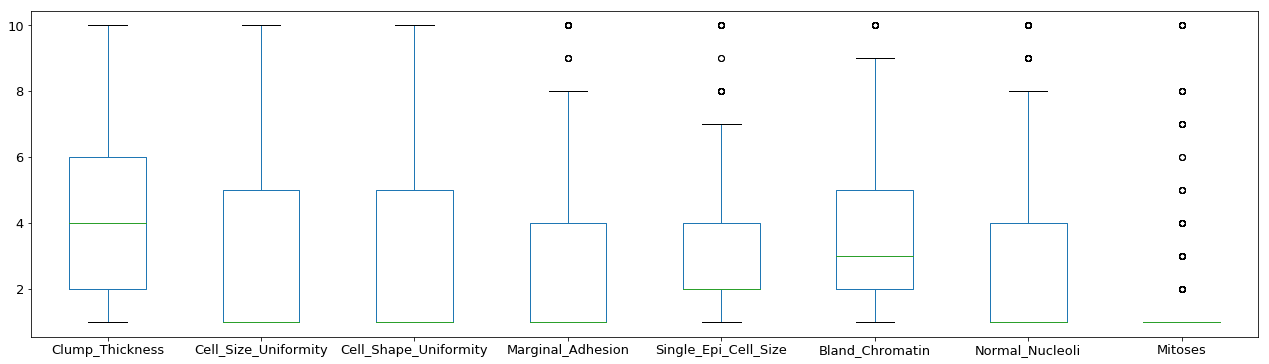

In [143]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
global data 
data = pd.read_csv('data.csv', header=0)
data.plot.box(fontsize=13, figsize=(22,6))

Com o boxplot foi possivel verificar algumas informações como outliers, distribuição dos dados etc. O que nos a judou a perceber que alguns atributos poderiam atrapalhar na classificação, como o atribudo **Mitoses** por exemplo que concentra a maior parte dos seus dados no valor 1, como podemos ver no box plot, e fica ainda mais claro no gráfico a seguir

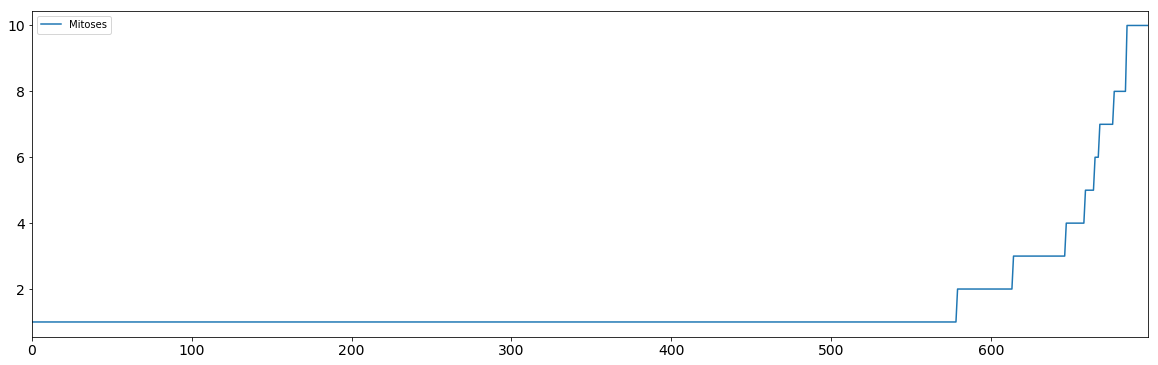

In [144]:
import matplotlib.pyplot as plt
pd.DataFrame({'Mitoses': sorted(data.Mitoses.values.tolist())}).plot.line(fontsize=14, figsize=(20,6))

Com base em alguns testes confirmamos a suposição de que alguns atributos poderiam atrapalhar a acuracia do modelo, e com isso removemos os atributos **Mitoses**, **Normal_Nucleoli**, e **Cell_Size_Uniformity**.



In [145]:
data = data.drop(columns=['Mitoses', 'Normal_Nucleoli', 'Cell_Size_Uniformity'])
data.loc[data['Single_Epi_Cell_Size'] > 7, 'Single_Epi_Cell_Size'
        ] = data['Single_Epi_Cell_Size'].median()

Os outliers detectados pelo box plot foram substituidos pela mediana do atributo. Além de outliers foram encontrados valores ausentes na tabela, mais precisamente 16 como podemos ver na tabela a seguir.

In [122]:
print('Valores ausentes:', len(data[data['Bare_Nuclei'] == '?']))
data[data['Bare_Nuclei'] == '?'].head()

Valores ausentes: 16


,Clump_Thickness,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Class
23,8,5,1,2.0,?,7,none
40,6,6,9,6.0,?,7,none
139,1,1,1,1.0,?,2,benign
145,1,3,1,2.0,?,2,benign
158,1,2,1,3.0,?,1,benign


Inicialmente substituimos os valores ausentes pela mediana, mas após alguns testes verificamos que remover os registros com valores ausentes melhorava a acurácia do modelo, então foi a técnica que resolvemos adotar.

In [123]:
data.loc[data['Bare_Nuclei'].eq('?'), 'Bare_Nuclei'] = 1

Foi aplicado a normalização dos atributos através da técnica MinMax, no intervalos entre 0 e 1 para que nenhum atributo tenha um peso maior nos algoritmos.


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col = data.columns.drop('Class')
data[col] = scaler.fit_transform(data[col])
data.head()

,Clump_Thickness,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Class
0,0.444444,0.000000,0.000000,0.166667,0.000000,0.222222,none
1,0.444444,0.333333,0.444444,1.000000,1.000000,0.222222,none
2,0.222222,0.000000,0.000000,0.166667,0.111111,0.222222,none
3,0.555556,0.777778,0.000000,0.333333,0.333333,0.222222,none
4,0.333333,0.000000,0.222222,0.166667,0.000000,0.222222,none


## 5. Modelagem

Agora que os dados já foram devidamente preparados iniciamos a construção dos modelos. O primeiro a ser desenvolvido foi o **Naive Bayes** Utilizando a biblioteca sklearn.

In [125]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Antes de começar a desenvolver o modelo baseado nos nossos dados precisamos remover os registros que estão sem classe.

In [126]:
data_none = data.loc[data['Class'].eq('none')]
data = data.loc[data['Class'].ne('none')]

Agora Inicializamos o **Naive Bayes**

In [127]:
label_encoder = preprocessing.LabelEncoder()
label =label_encoder.fit_transform(data['Class'])
model = GaussianNB()
data2 = data.drop(columns=['Class'])
model.fit(data2,label)
predicted= model.predict(data2)
model.score(data2,label)

0.9732142857142857

Para avaliar o modelo utilizamos a validação cruzada 10-folds

In [128]:
import numpy as np 


Naive_bayes_score = 0
for i in range(10):
    msk = np.random.rand(len(data2)) < 0.9
    train_data  = data2[msk]
    train_label = label[msk]
    
    test_data  = data2[~msk]
    test_label = label[~msk]
    
    model.fit(train_data,train_label)
    Naive_bayes_score += model.score(test_data,test_label)

Naive_bayes_score = Naive_bayes_score / 10

print(Naive_bayes_score)    

0.9827010314995561


Agora o K-NN

In [129]:
from sklearn.neighbors import KNeighborsClassifier

cancer_class = {'benign':0, 'malignant':1}
data['Class_num'] = [cancer_class[i] for i in data.Class]
X = data.drop(['Class', 'Class_num'], axis=1)
y = data.Class_num

KNN_score = 0
for i in range(10):
    msk = np.random.rand(len(data)) < 0.9
    train_X = X[msk]
    train_Y = y[msk]
    
    test_X = X[~msk]
    test_Y = y[~msk]
    knn = KNeighborsClassifier(n_neighbors=1)

    knn.fit(train_X, train_Y)

    KNN_score += knn.score(test_X, test_Y)

KNN_score = KNN_score/10

print("Score:", KNN_score)

Score: 0.9733695591111602


Arvore de decisão

In [130]:
from sklearn import tree

Tree_score = 0
for i in range(10):
    msk = np.random.rand(len(data2)) < 0.9
    train_data  = data2[msk]
    train_label = label[msk]
    
    test_data  = data2[~msk]
    test_label = label[~msk]
    
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(train_data, train_label)
    
    
    Tree_score += clf.score(test_data,test_label)
    
Tree_score = Tree_score /10

print("Score:", Tree_score)

Score: 0.9599899796176627


## 5. Avaliação
Para avaliar a acruacia de cada modelo foi utilizado o metodo de avaliação cruzada 10-Folds e com base nesses scores o modelo que apresentou o melhor resultado foi o **Naive Bayes**.




In [131]:
pd.DataFrame(
    {'Algoritmo': ['Naive_Bayes','K-NN', 'Arvore de Decisão'],
     'Precisão' : [Naive_bayes_score, KNN_score, Tree_score]}
).head()

,Algoritmo,Precisão
0,Naive_Bayes,0.982701
1,K-NN,0.973370
2,Arvore de Decisão,0.959990


Agora vamos classificar nossos registros que estavam sem classe Com o Naive Bayes

In [132]:
model = GaussianNB()
model.fit(data2,label)

data_predict = data_none.loc[data_none['Class'].eq('none')]

data_predict = data_predict.drop(columns=['Class'])

predicted= model.predict(data_predict)

c = ['malignant', 'benign']
cancer_class = [c[i] for i in predicted]

data_predict['Class'] = cancer_class
data_predict.head(10)


,Clump_Thickness,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Class
0,0.444444,0.000000,0.000000,0.166667,0.000000,0.222222,malignant
1,0.444444,0.333333,0.444444,1.000000,1.000000,0.222222,benign
2,0.222222,0.000000,0.000000,0.166667,0.111111,0.222222,malignant
3,0.555556,0.777778,0.000000,0.333333,0.333333,0.222222,benign
4,0.333333,0.000000,0.222222,0.166667,0.000000,0.222222,malignant
5,0.777778,1.000000,0.777778,1.000000,1.000000,0.888889,benign
6,0.000000,0.000000,0.000000,0.166667,1.000000,0.222222,benign
7,0.111111,0.111111,0.000000,0.166667,0.000000,0.222222,malignant
8,0.111111,0.000000,0.000000,0.166667,0.000000,0.000000,malignant
9,0.333333,0.000000,0.000000,0.166667,0.000000,0.111111,malignant


depois de classificar vamos validar com os resultados do arquivo fornecido pelo professor e avaliar a acuracia.

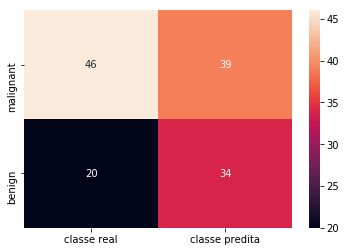

In [133]:
from sklearn.metrics import confusion_matrix
from confusion_matrix import plot_confusion_matrix
import seaborn as sn

anexo1 = pd.read_csv('anexo_1.csv', nrows=139)


confusion = confusion_matrix(anexo1.Class,data_predict.Class)
confusion = pd.DataFrame(data=confusion, columns=['classe real', 'classe predita'], index=c)
sn.heatmap(confusion,  annot=True)


